# #COMP_381
## Predicting Crime Location_Summer 2018

Ahmed al-Mogeet



*Project overview

In this project I will use ClassificationTrees, k-NN, and Regression to examine a set of data collected by province of British Coulmbia about crime in Vancouver from 2003-2017 to be able to produce a model that is capable of predicting dangours areas using time and block location.

the dataset coonsists of: Type of crime, exact time and date (as I removed all duplicates and NaNs), and location 

The models im building are capable of answering the follwing questions:

What locations we should place more police units and at what time of the day? 
What type of crimes tend to happen more in a particular area?



# Trees

_This model main goal is to make prediction about what area has most crime. The predictor is nieghour's location uses features such as: Type of crime, Block location, Hour of crime.

_The data has been minipulated by changing catagorical varibles to integers.

_The data is collected from the city of Vancouver Canada between the years of 2003-2017. https://www.kaggle.com/damianpanek/vancouver-crime/data _This is not a supervised method since we're lookinf for a certain answer.

_Block location is main factor to dtermine wheather if
a Nighbourhood Block is safe or not


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
    from sklearn.cross_validation import train_test_split
    from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
    from sklearn.metrics import confusion_matrix, mean_squared_error, precision_recall_fscore_support, accuracy_score
    from sklearn.cross_validation import train_test_split
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LinearRegression, Lasso
    from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import confusion_matrix, accuracy_score


/home/root1/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# downloading the dataset
df3 = pd.read_csv('crime-ed11.csv')
# showing the labels for the table 
df3.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD
0,Other Theft,2003,5,12,16,15,9XX TERMINAL AVE,Strathcona
1,Other Theft,2003,5,7,15,20,9XX TERMINAL AVE,Strathcona
2,Other Theft,2003,4,23,16,40,9XX TERMINAL AVE,Strathcona
3,Other Theft,2003,4,20,11,15,9XX TERMINAL AVE,Strathcona
4,Other Theft,2003,4,12,17,45,9XX TERMINAL AVE,Strathcona


In [4]:
# factrorizing data to with vallues from -1 to 1

# setting 
df3.NEIGHBOURHOOD = pd.factorize(df3.NEIGHBOURHOOD)[0]
df3.TYPE = pd.factorize(df3.TYPE)[0]
df3.HUNDRED_BLOCK = pd.factorize(df3.HUNDRED_BLOCK)[0]

df3.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD
0,0,2003,5,12,16,15,0,0
1,0,2003,5,7,15,20,0,0
2,0,2003,4,23,16,40,0,0
3,0,2003,4,20,11,15,0,0
4,0,2003,4,12,17,45,0,0


In [5]:
# spliting the dataset and dropiing the predictor Nieghbourhood
X = df3.drop(['NEIGHBOURHOOD'], axis=1)
y = df3.NEIGHBOURHOOD

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [6]:
X.columns

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK'], dtype='object')

In [7]:
# selecting the TreeClassaifier with depth 
regr2 = DecisionTreeRegressor(max_depth=7)
regr2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

25.156309641982691

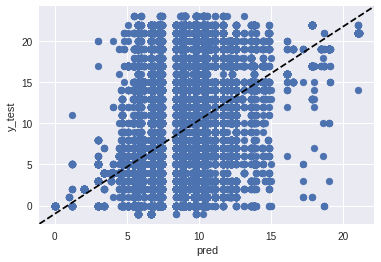

In [8]:
pred = regr2.predict(X_test)

plt.scatter(pred, y_test, label='NIEGHBOURHOOD')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

Our mean square is 25.01 and the sqaure root for is 5 that's mean most crimes comitted are around the Central Business District Area in Vancouver 

In [9]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

14.63617461166818

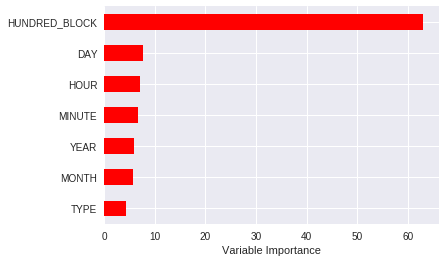

In [10]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

We can see that the most feature affects of the Nieghbourhoos is the block. This means there are blocks are significantly more dangerous than others. Therefore we can use this conclusion to place more police units at thoes blocks. 

In [11]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

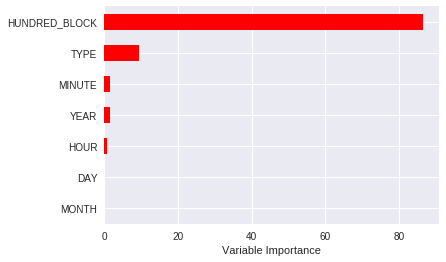

In [12]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

End of the regression trees

# k-NN

This is model is capable of predicting nieghbour's based on hour, year, type, and block number of crime. I will use auc test to determine if my model is able to produce. This is database can be find on https://www.kaggle.com/damianpanek/vancouver-crime/data This model is using supervised task

In [13]:
# spliting the dataset and dropiing the predictor Nieghbourhood
df3_train = df3[['YEAR', 'HUNDRED_BLOCK' , 'TYPE']]
X_train = df3_train
y_train = df3['NEIGHBOURHOOD']

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [14]:
df3_test = df3[['YEAR', 'HUNDRED_BLOCK' , 'TYPE']]
X_test = df3_train
y_test = df3['NEIGHBOURHOOD']

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [15]:
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [16]:
knn_preds = knn.predict(X_test)

conf = confusion_matrix(y_test, knn_preds, labels=knn.classes_)
print('Confusion matrix:\n')
print(knn.classes_)
print(conf)
acc = accuracy_score(y_test, knn_preds)
print('\nThe accuracy is: ', acc)

Confusion matrix:

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[[  630     1     0     0     1     2     0     0     0     2     0     2
      0     0     0     0     0     0     0     0     0     0     0     1
      0]
 [    0 10280    17   114    52   135   653    52   102   118    15    60
     27    35    33   209    65    18    56    16    53    23    20     4
      2]
 [    0    76  2158    58    35    63   137    29   101    52    43   110
     40    54    45    78    89     7    45    39    25    25    30     5
      3]
 [    0   276    56 11296   104   368   577    67   373   229    24   121
     55    31    64   240   152    17   162    16    51    22    14    32
      4]
 [    0   178    58   178  6877   137   360   139   135   140    35   115
    112    56    76   169    95    12    95    22   105    21    58    10
      5]
 [    0   111    32   159    50 20150  1088    13    44    76     7    44
     20     2     6    73   113    30    24  

we have 23 nieghbourhood

In [17]:
acc = accuracy_score(y_test, knn_preds)
print('\nThe accuracy is: ', acc)


The accuracy is:  0.811420838552


81% is very good number, in conlusion we can predict the type of crime based on its location


# Logestic Regression 

In [18]:
X = df3.drop(['NEIGHBOURHOOD'], axis=1)

# encode categorical variables as numeric variables using the get_dummies() function
X = df3
y = df3['NEIGHBOURHOOD']

train_size = 5000
X_full_train = X[0:train_size]
X_full_test = X[train_size:]

y_train = y[0:train_size]
y_test = y[train_size:]

lm = LinearRegression()
lm.fit(X_full_train, y_train)

preds_full = lm.predict(X_full_test)
mse_full = mean_squared_error(y_test, preds_full)
print("The MSE using all features is %s" % mse_full)



The MSE using all features is 4.46638842273e-27


In [19]:
perc = 80 # percentage of features to keep 

selector = SelectPercentile(f_regression, percentile=perc)
selector.fit_transform(X_full_train, y_train)
selected_cols = selector.get_support()
selected_feas = X_full_train.columns.values[selected_cols]
print("These are the feas that were selected:\n")
print(selected_feas)

X_sub_train = X_full_train[selected_feas]

X_sub_test = X_full_test[selected_feas] 

These are the feas that were selected:

['TYPE' 'DAY' 'HOUR' 'MINUTE' 'HUNDRED_BLOCK' 'NEIGHBOURHOOD']


/home/root1/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/home/root1/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/home/root1/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/root1/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/root1/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The MSE using just the selected features is 1.05761777499e-27


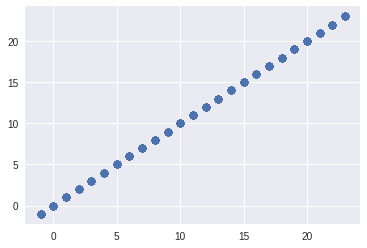

In [20]:
lm_sub = LinearRegression()
lm_sub.fit(X_sub_train, y_train)

preds_sub = lm_sub.predict(X_sub_test)
mse_sub = mean_squared_error(y_test, preds_sub)
print("The MSE using just the selected features is %s" % mse_sub)

plt.figure()
plt.scatter(y_test, preds_sub)
plt.show()

The Linear regression is not good for this model as the plot shows it can't make predication 